In [1]:
import sklearn.manifold._spectral_embedding as SE
import numpy as np
import pandas as pd 
import pickle as pkl


In [43]:
from debugpy._vendored.pydevd.pydevd_attach_to_process.winappdbg.win32.version import os
from validation.profile_builder import make_temp_dict, FastAreader, Contig, BuildProfile
import validation.fastaReader
from contig import contig

temp_dict, kmer_dict = make_temp_dict(5)
myReader = FastAreader('assembly_2.fasta')
objList = []
for head, seq in myReader.readFasta():
    objList.append(Contig(head, seq, templateDict=temp_dict, kmerMap=kmer_dict))
profile = BuildProfile(objList=objList, templateKmerDict=temp_dict)
profile.df

ModuleNotFoundError: No module named 'winappdbg'

In [80]:
import os
with open('validation/assembly_2_profiles.pkl', 'rb') as file:
    df = pkl.load(file)

with open(os.path.join('df2.pkl'), 'wb') as f:
    pkl.dump(df, f)
    print(f'Dumped File')

array_data = df.values.astype(np.float64)
array_data.shape

Dumped File


(197, 512)

In [82]:
df2 = pd.read_pickle('df2.pkl')
df2

In [25]:
def KL_divergence(p_i, q_i):
    return p_i * np.log2(p_i / q_i)

def KL_divergence(p_i, q_i):
    # Avoid division by zero and log(0) issues
    if p_i > 0 and q_i > 0:
        return p_i * np.log2(p_i / q_i)
    else:
        return 0




In [58]:
matrix = np.zeros_like(array_data)

def KL_divergence(p, q):
    mask = (p > 0) & (q > 0)
    return np.sum(p[mask] * np.log2(p[mask] / q[mask]))

n = matrix.shape[0]
kl_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i != j:
            kl_matrix[i, j] = KL_divergence(matrix[i], matrix[j])


sym_matrix = (kl_matrix + kl_matrix.T) / 2

from sklearn.cluster import SpectralClustering

clustering = SpectralClustering(n_clusters=3, affinity='precomputed')
labels = clustering.fit_predict(kl_matrix)
print(labels)

[1 2 0 0 0 0 0 2 1 1 0 1 1 1 1 1 1 2 1 1 1 2 1 0 1 1 1 2 1 1 2 1 2 2 2 2 0
 2 1 2 2 1 1 2 2 1 0 2 2 0 1 2 2 1 2 2 1 1 2 2 2 2 2 2 1 1 2 0 0 1 1 2 2 2
 1 1 2 1 0 2 1 2 0 1 1 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2 0 1 0 0 1 0 1 0
 2 1 2 1 0 0 1 1 2 1 0 2 2 1 1 0 1 0 1 1 1 0 0 1 2 1 1 2 1 2 1 2 2 1 2 1 0
 1 2 2 2 0 2 1 1 2 1 1 1 1 0 2 1 2 2 1 0 0 2 1 1 1 1 2 2 0 2 2 1 2 0 2 2 1
 1 2 1 1 2 1 0 2 1 1 1 1]


/opt/homebrew/Caskroom/miniconda/base/envs/data/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [36]:
from sklearn.manifold import SpectralEmbedding

embedding = SpectralEmbedding(n_components=2) 
spectral_embedding = embedding.fit_transform(kl_matrix)

print(spectral_embedding)


[[ 2.89789139e-16  2.51955557e-15]
 [ 1.01426199e-15  9.36448238e-16]
 [ 4.50783106e-16  2.41490949e-17]
 [-2.89789139e-16  3.34330803e-15]
 [-4.15901080e-16 -3.91751985e-16]
 [-6.27876469e-16  3.00790394e-15]
 [-3.27354398e-16  1.07865957e-15]
 [-4.02484916e-17 -1.70385281e-15]
 [ 8.90833280e-16 -5.01764528e-16]
 [ 2.03657367e-15 -5.71796904e-15]
 [ 2.06608923e-16 -4.95324770e-15]
 [ 4.80298666e-16  1.78434979e-15]
 [-8.42535090e-16  3.28159368e-15]
 [-8.88150048e-16 -1.23428708e-15]
 [-6.17143538e-16  1.63408876e-15]
 [-7.80820737e-16 -1.08402604e-15]
 [-4.82981899e-17  1.54554208e-15]
 [-2.76372976e-16  2.27538139e-15]
 [-2.22708320e-16 -5.74748460e-15]
 [-3.39859801e-02  4.06637515e-02]
 [-4.28044231e-03 -4.02726683e-03]
 [-4.98413899e-03  4.76055057e-02]
 [ 6.02843072e-03 -3.75200922e-03]
 [ 1.81132711e-02 -3.49933053e-02]
 [ 5.95753815e-03 -8.64282441e-03]
 [ 2.10887899e-02  2.57869292e-02]
 [-2.06867781e-02 -5.66217935e-03]
 [ 9.34029727e-03 -8.92131060e-03]
 [ 9.50775450e-03 -8

In [38]:
from sklearn.cluster import SpectralClustering


n_clusters = 3  
clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed')
labels = clustering.fit_predict(kl_matrix)

print(labels)



ValueError: array must be 2-dimensional and square. shape = (197, 2)

In [53]:
import numpy as np
from sklearn.manifold import SpectralEmbedding
from sklearn.cluster import SpectralClustering

matrix = np.copy(array_data)
def KL_divergence(p, q):
    p = np.where(p == 0, 1e-9, p)
    q = np.where(q == 0, 1e-9, q)
    return np.sum(p * np.log2(p / q), axis=1)

n = matrix.shape[0]
kl_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i != j:
            kl_matrix[i, j] = KL_divergence(matrix[i:i+1, :], matrix[j:j+1, :])


# Here, we use the exponential of the negative KL divergence to convert distances to similarities
similarity_matrix = np.exp(-kl_matrix)
print(similarity_matrix)

# Spectral Embedding
embedding = SpectralEmbedding(n_components=4, affinity='precomputed')
spectral_embedding = embedding.fit_transform(similarity_matrix)

# Spectral Clustering
n_clusters = 4  
clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed')
labels = clustering.fit_predict(similarity_matrix)

print("Spectral Embedding:\n", spectral_embedding)
print("Cluster Labels:\n", labels)


/var/folders/t1/rykjfyg97_b28tz4yzw1jjbh0000gn/T/ipykernel_75183/3981869596.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  kl_matrix[i, j] = KL_divergence(matrix[i:i+1, :], matrix[j:j+1, :])


[[1.         0.50968249 0.60438896 ... 0.61350518 0.46243808 0.52703411]
 [0.50132947 1.         0.86287748 ... 0.90912486 0.97634586 0.91150161]
 [0.61085764 0.86042262 1.         ... 0.94817895 0.84655628 0.93807632]
 ...
 [0.61724726 0.91024042 0.94670801 ... 1.         0.89621429 0.96646119]
 [0.48372534 0.97694451 0.85064612 ... 0.89614693 1.         0.90605972]
 [0.54430259 0.91281445 0.93817963 ... 0.96606579 0.90862386 1.        ]]
Spectral Embedding:
 [[ 1.38820585e-02 -4.98463448e-04  2.00433282e-03  9.64844094e-03]
 [-2.45328506e-03  6.37949739e-03 -4.51757334e-03  2.71829288e-03]
 [ 4.64699535e-06 -1.20658435e-03  1.19183360e-02 -6.27679365e-05]
 [ 1.79831404e-02  4.72963623e-03 -2.14022668e-03 -2.28392778e-03]
 [-2.88022909e-03 -6.40797458e-03 -7.69262954e-03 -4.19433347e-03]
 [-1.48957347e-03  5.23887927e-03 -1.42257818e-03  3.40326850e-03]
 [-8.55330943e-04 -8.43363414e-03 -4.60989762e-03  4.54679972e-04]
 [-3.10696271e-03  7.24021723e-03 -4.62370033e-03  1.14918026e-03]

/opt/homebrew/Caskroom/miniconda/base/envs/data/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:247: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
/opt/homebrew/Caskroom/miniconda/base/envs/data/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:247: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


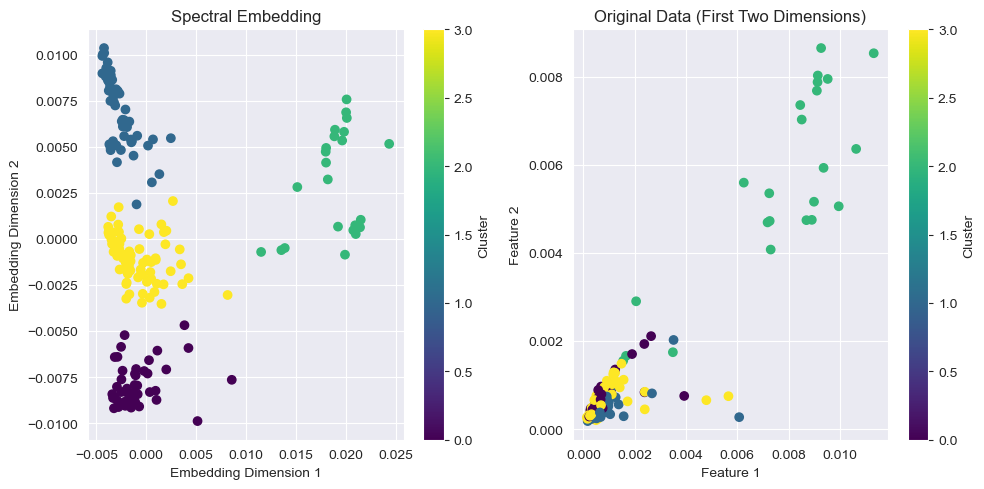

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))

# First subplot for spectral embedding
plt.subplot(1, 2, 1)
plt.title("Spectral Embedding")
plt.scatter(spectral_embedding[:, 0], spectral_embedding[:, 1], c=labels, cmap='viridis')
plt.colorbar(label='Cluster')
plt.xlabel('Embedding Dimension 1')
plt.ylabel('Embedding Dimension 2')


plt.subplot(1, 2, 2)
plt.title("Original Data (First Two Dimensions)")
plt.scatter(matrix[:, 0], matrix[:, 1], c=labels, cmap='viridis')
plt.colorbar(label='Cluster')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

In [55]:
# Now to retrieve rows from the original matrix that are part of the same cluster
clustered_rows = {}
for label in np.unique(labels):
    clustered_rows[label] = matrix[labels == label]
print(clustered_rows)

cluster_0_rows = clustered_rows[0]
print("Rows in cluster 0:\n", cluster_0_rows)

for cluster, rows in clustered_rows.items():
    print(f"Rows in cluster {cluster}:\n{rows}\n")

{0: array([[0.00028292, 0.00046296, 0.00046296, ..., 0.00946502, 0.00316358,
        0.00447531],
       [0.0007511 , 0.00079282, 0.00112664, ..., 0.00805341, 0.00150219,
        0.00396411],
       [0.00238336, 0.00083418, 0.00125127, ..., 0.00709051, 0.00303879,
        0.00286004],
       ...,
       [0.00189698, 0.00170242, 0.0017997 , ..., 0.00418308, 0.00141057,
        0.00267523],
       [0.0006702 , 0.0006702 , 0.00080424, ..., 0.00860836, 0.00172763,
        0.00379781],
       [0.00070141, 0.00079134, 0.00098917, ..., 0.00775152, 0.00185245,
        0.00393871]]), 1: array([[0.00064602, 0.00050246, 0.0007178 , ..., 0.00904425, 0.00635251,
        0.00455802],
       [0.00137463, 0.00055844, 0.00131019, ..., 0.00545556, 0.00603548,
        0.00266334],
       [0.00060122, 0.00031174, 0.00071255, ..., 0.00935225, 0.00605669,
        0.00414171],
       ...,
       [0.00092502, 0.0006616 , 0.00097096, ..., 0.00664972, 0.00517643,
        0.00341828],
       [0.00090888, 0.00073

In [56]:
# Create sets for each cluster containing the indices of the rows in that cluster
cluster_sets = {i: set() for i in range(2)}

for index, label in enumerate(labels):
    cluster_sets[label].add(index)

# Now, cluster_sets contains the indices of the rows in each cluster
for cluster, indices in cluster_sets.items():
    print(f"Cluster {cluster} contains rows: {indices}")

KeyError: 2

In [57]:
indices_to_find = [160, 1, 194, 3, 68, 197, 198, 7, 9, 10, 11, 43, 13, 14, 175, 17, 19, 22]

# Dictionary to hold the result
index_cluster_map = {}

# Iterate over the list of indices and map them to their respective cluster
for index in indices_to_find:
    if index < len(labels):
        cluster = labels[index]
        index_cluster_map[index] = cluster
    else:
        print(f"Index {index} is out of bounds for the labels array.")

# Output the result
for index, cluster in index_cluster_map.items():
    print(f"Index {index} belongs to cluster {cluster}")

Index 197 is out of bounds for the labels array.
Index 198 is out of bounds for the labels array.
Index 160 belongs to cluster 3
Index 1 belongs to cluster 1
Index 194 belongs to cluster 3
Index 3 belongs to cluster 2
Index 68 belongs to cluster 3
Index 7 belongs to cluster 1
Index 9 belongs to cluster 3
Index 10 belongs to cluster 0
Index 11 belongs to cluster 2
Index 43 belongs to cluster 2
Index 13 belongs to cluster 0
Index 14 belongs to cluster 3
Index 175 belongs to cluster 2
Index 17 belongs to cluster 3
Index 19 belongs to cluster 0
Index 22 belongs to cluster 0


In [70]:
with open('adj.pkl', 'rb') as f:
    adj_matrix = pkl.load(f)
data = nx.from_numpy_array(adj_matrix, parallel_edges=False, create_using=nx.Graph)

data.shape

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

In [96]:
indices_to_find = [160, 194, 3, 68, 197, 198, 7, 9, 10, 11, 43, 13, 14, 175, 17, 19, 22]

# Step 1: Construct contig names from the indices_to_find
contig_names = [f'contig_{i}' for i in indices_to_find]

# Step 2: Find the actual row indices in df2 for these contig names
actual_indices = []
missing_contigs = []
for contig_name in contig_names:
    try:
        index = df2.index.get_loc(contig_name)
        actual_indices.append(index)
    except KeyError:
        missing_contigs.append(contig_name)

# Check for any missing contigs
if missing_contigs:
    print("Missing contigs in df2:", missing_contigs)
else:
    print("All contigs found in df2.")


# Extract the rows of interest
subset_matrix = matrix[actual_indices, :]
subset_matrix.shape

Missing contigs in df2: ['contig_1']


(17, 512)

In [97]:
def KL_divergence(p, q):
    p = np.where(p == 0, 1e-9, p)  # Avoid division by zero
    q = np.where(q == 0, 1e-9, q)
    return np.sum(p * np.log2(p / q))

# Compute the pairwise KL divergence score for each column and sum up
n = subset_matrix.shape[0]
kl_scores = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i != j:
            for k in range(subset_matrix.shape[1]):
                kl_scores[i, j] += KL_divergence(subset_matrix[i, k], subset_matrix[j, k])


In [106]:

# Normalize the KL divergence scores, if necessary
# For example, using Min-Max normalization
kl_min, kl_max = kl_scores.min(), kl_scores.max()
kl_normalized = (kl_scores - kl_min + 1) / (kl_max - kl_min + 1)


In [99]:
kl_normalized.shape

(17, 17)

In [110]:
from sklearn.manifold import SpectralEmbedding

# Perform spectral embedding on the KL divergence matrix
embedding = SpectralEmbedding(n_components=3, affinity='precomputed')
spectral_embedding = embedding.fit_transform(kl_scores)
labels = clustering.fit_predict(kl_scores)


print(spectral_embedding.shape[0])

17


/opt/homebrew/Caskroom/miniconda/base/envs/data/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/data/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Text(0, 0.5, 'Embedding Dimension 2')

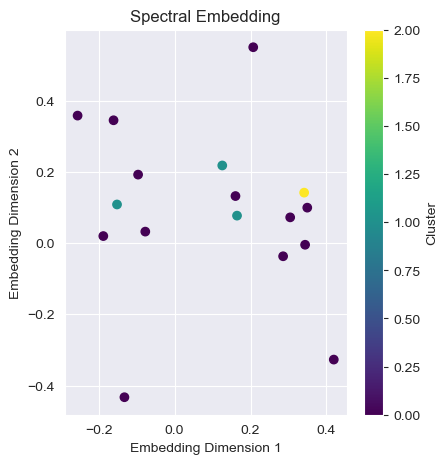

In [111]:
plt.figure(figsize=(10, 5))
# First subplot for spectral embedding
plt.subplot(1, 2, 1)
plt.title("Spectral Embedding")
plt.scatter(spectral_embedding[:, 0], spectral_embedding[:, 1], c=labels, cmap='viridis')
plt.colorbar(label='Cluster')
plt.xlabel('Embedding Dimension 1')
plt.ylabel('Embedding Dimension 2')

In [118]:

# Mapping each index in kl_normalized to its cluster
index_to_cluster = {index: label for index, label in enumerate(labels)}

index_to_contig = {index: df2.index[index] for index in range(len(df2))}

print("Index to Cluster Mapping:")
for index, cluster in index_to_cluster.items():
    print(f"Index {index} is in Cluster {cluster}")

print("\nIndex to Contig Name Mapping:")
for index, contig in index_to_contig.items():
    print(f"Index {index} corresponds to Contig {contig}")
    
contig_to_cluster = {index_to_contig[index]: index_to_cluster[index] for index in actual_indices}
print(contig_to_cluster)

Index to Cluster Mapping:
Index 0 is in Cluster 0
Index 1 is in Cluster 0
Index 2 is in Cluster 0
Index 3 is in Cluster 1
Index 4 is in Cluster 0
Index 5 is in Cluster 0
Index 6 is in Cluster 0
Index 7 is in Cluster 0
Index 8 is in Cluster 0
Index 9 is in Cluster 1
Index 10 is in Cluster 2
Index 11 is in Cluster 0
Index 12 is in Cluster 0
Index 13 is in Cluster 1
Index 14 is in Cluster 0
Index 15 is in Cluster 0
Index 16 is in Cluster 0

Index to Contig Name Mapping:
Index 0 corresponds to Contig contig_10
Index 1 corresponds to Contig contig_100
Index 2 corresponds to Contig contig_101
Index 3 corresponds to Contig contig_102
Index 4 corresponds to Contig contig_103
Index 5 corresponds to Contig contig_104
Index 6 corresponds to Contig contig_105
Index 7 corresponds to Contig contig_106
Index 8 corresponds to Contig contig_107
Index 9 corresponds to Contig contig_108
Index 10 corresponds to Contig contig_109
Index 11 corresponds to Contig contig_11
Index 12 corresponds to Contig conti

KeyError: 64

In [85]:
#[9, 1, 17, 7, 198, 197,
# 1, , ,0, 1, 1, 0

KeyError: 197

In [117]:
# Dictionary to hold the result
index_cluster_map = {}

# Iterate over the list of indices and map them to their respective cluster
for index in range(kl_matrix.shape[0]):
    if index < len(labels):
        cluster = labels[index]
        index_cluster_map[index] = cluster
    else:
        print(f"Index {index} is out of bounds for the labels array.")

# Output the result
for index, cluster in index_cluster_map.items():
    print(f"Index {index} belongs to cluster {cluster}")

Index 17 is out of bounds for the labels array.
Index 18 is out of bounds for the labels array.
Index 19 is out of bounds for the labels array.
Index 20 is out of bounds for the labels array.
Index 21 is out of bounds for the labels array.
Index 22 is out of bounds for the labels array.
Index 23 is out of bounds for the labels array.
Index 24 is out of bounds for the labels array.
Index 25 is out of bounds for the labels array.
Index 26 is out of bounds for the labels array.
Index 27 is out of bounds for the labels array.
Index 28 is out of bounds for the labels array.
Index 29 is out of bounds for the labels array.
Index 30 is out of bounds for the labels array.
Index 31 is out of bounds for the labels array.
Index 32 is out of bounds for the labels array.
Index 33 is out of bounds for the labels array.
Index 34 is out of bounds for the labels array.
Index 35 is out of bounds for the labels array.
Index 36 is out of bounds for the labels array.
Index 37 is out of bounds for the labels

<Axes: >

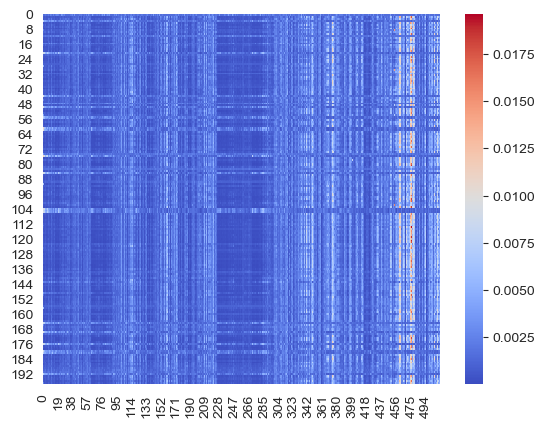

In [116]:
import seaborn as sb

sb.heatmap(array_data, cmap="coolwarm")

In [119]:
original_dict = {'contig_44': 0, 'contig_195': 0, 'contig_176': 0, 'contig_2': 1, 'contig_23': 0, 'contig_14': 0, 'contig_198': 1, 'contig_199': 1, 'contig_15': 2, 'contig_12': 1, 'contig_10': 1, 'contig_11': 1, 'contig_8': 1, 'contig_161': 2, 'contig_4': 2, 'contig_18': 1, 'contig_20': 2}

reversed_dict = {}

for contig, label in original_dict.items():
    if label in reversed_dict:
        reversed_dict[label].append(contig)
    else:
        reversed_dict[label] = [contig]

reversed_dict

{0: ['contig_44', 'contig_195', 'contig_176', 'contig_23', 'contig_14'],
 1: ['contig_2',
  'contig_198',
  'contig_199',
  'contig_12',
  'contig_10',
  'contig_11',
  'contig_8',
  'contig_18'],
 2: ['contig_15', 'contig_161', 'contig_4', 'contig_20']}